   CustomerID   Genre  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


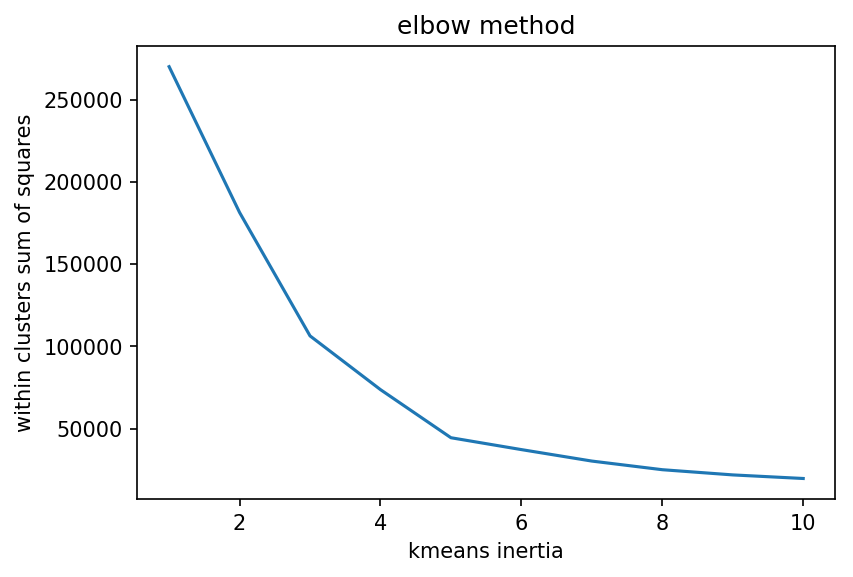

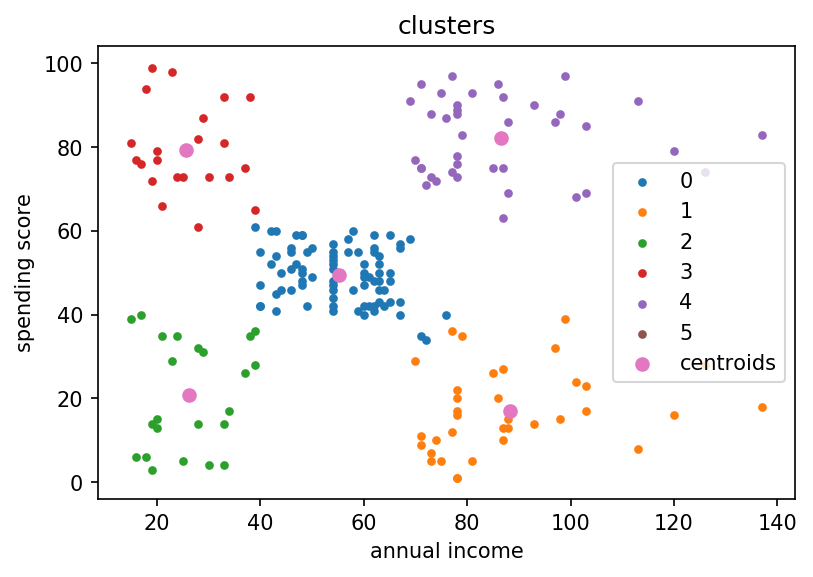

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

dataset = pd.read_csv('C:\data\\udemy\Mall_Customers.csv')

print(dataset.head())

X = dataset.iloc[:,3:5].values


from sklearn.cluster import KMeans

wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters = i , init = 'k-means++', max_iter = 300, n_init = 10 , random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
#elbow method   
plt.plot(range(1,11), wcss)
plt.xlabel('kmeans inertia')
plt.ylabel('within clusters sum of squares')
plt.title('elbow method')
plt.rcParams['figure.dpi'] = 150
plt.legend()
plt.show()
    
kmeans = KMeans(n_clusters = 5 , init = 'k-means++', max_iter = 300, n_init = 10 , random_state = 42)
y_means = kmeans.fit_predict(X)
    
#cluster plot
for i in range(0,6):
    plt.scatter(X[y_means == i, 0], X[y_means == i, 1], s = 10, label = i)
    
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1], label = 'centroids')
plt.xlabel('annual income')
plt.ylabel('spending score')
plt.title('clusters')
plt.rcParams['figure.dpi'] = 150
plt.legend()
plt.show()